In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls

fifa21_train.csv result.ipynb


In [3]:
df = pd.read_csv('fifa21_train.csv')

In [4]:
#
# Standardize column names
#
def standardize_column_names(df):
    data = df.copy()
    cols = []
    for col in data.columns:
        cols.append(col.lower())
    data.columns = cols
    return data

In [5]:
#
# Clean Columns 0-33
#
def drop_cols(df):
    df2 = df.copy()
    df2=df2.dropna(axis=1, 
                thresh=int((10/100)*df2.shape[0] + 1))
    return df2

def fill_club(df, fill):
    df2 = df.copy()
    df2['club']=df2['club'].fillna(fill)
    return df2

def fix_height(x):
    s=x.split("'")
    s[1]=s[1].replace('"',"")
    return float(s[0])+(float(s[1])/100)*8

def fix_weight(value):
    if type(value) == str:
        if value.find('lbs') != -1:
            return float(value.replace('lbs',''))
        else:
            return float(value)
        
def fill_pos(df, fill):
    df2 = df.copy()
    df2['position']=df2['position'].fillna(fill)
    return df

def fix_money(x):
    x=x.replace('€','')
    s=x.replace('$','')
    if s.find("K") != -1:
        s=s.replace("K","")
        return float(s)*1000
    elif s.find("M") != -1:
        s=s.replace("M","")
        return float(s)*1000000
    else:
        return float(s)    

def clean_0_33(df):
    """
        Cleans columns 0-33.
        Input -> data   Dataframe to clean
        Output -> Dataframe with cleaned columns 0-33
    """
    
    clean=df.copy()
    clean=drop_cols(clean)
    clean=fill_club(clean, 'Free Agent')
    clean=fill_pos(clean, clean['bp'])
    dropped_rows=clean[clean['joined'].isna()==True].index
    clean=clean.drop(dropped_rows, axis=0)
    clean['height']=clean['height'].apply(fix_height)
    clean['weight']=clean['weight'].apply(fix_weight)
    clean['value']=clean['value'].apply(fix_money)
    clean['release clause']=clean['release clause'].apply(fix_money)
    clean['wage']=clean['wage'].apply(fix_money)
    return clean


In [6]:
#
# Cleans columns 34-66 of given dataset
#
def clean_34_66(data):
    """
        Cleans columns 34-66.
        Input -> data   Dataframe to clean
        Output -> Dataframe with cleaned columns 34-66
    """
    
    clean = data.copy()    
    clean['balance'] = clean['balance'].fillna(round(clean['balance'].mean(), 2))
    clean['jumping'] = clean['jumping'].fillna(round(clean['jumping'].mean(), 2))
    clean['interceptions'] = clean['interceptions'].fillna(round(clean['interceptions'].mean(), 2))
    clean['positioning'] = clean['positioning'].fillna(round(clean['positioning'].mean(), 2))
    clean['vision'] = clean['vision'].fillna(round(clean['vision'].mean(), 2))
    clean['composure'] = clean['composure'].fillna(round(clean['composure'].mean(), 2))
    clean['sliding tackle'] = clean['sliding tackle'].fillna(round(clean['sliding tackle'].mean(), 2))
    clean['a/w'] = clean['a/w'].fillna('Medium')
    clean['d/w'] = clean['d/w'].fillna('Medium')
    clean['w/f'] = clean['w/f'].apply(lambda val: val.replace('★', ''))
    clean['sm'] = clean['sm'].apply(lambda val: val.replace('★', ''))
    clean['ir'] = clean['ir'].apply(lambda val: val.replace('★', ''))
    return clean
    

In [7]:
#
# Clean Columns 67-101
#
#%writefile functions.py
# import functions
# functions.clean_hits()
# from functions import clean_hits

def clean_hits(value):
    if value.find('K') != -1:
        v = value.replace('K', '')
        return float(v) * 1000
    else:
        return float(value) *1000

def clean_positions(value):
    if type(value) is str:
        if value.find('+-') or value.find('+'):
            s = value.split('+')
            return float(s[0])
        elif value.find('-'):
            s = value.split('-')
            return float(s[0])
    else:
        return value
    
def clean_67_101(df3):
    """
        Cleans columns 67-101.
        Input -> data   Dataframe to clean
        Output -> Dataframe with cleaned columns 67-101
    """
    
    clean = df3.copy()
    clean['hits'] = clean['hits'].apply(clean_hits)
    clean['ls'] = clean['ls'].apply(clean_positions)
    clean['st'] = clean['st'].apply(clean_positions)
    clean['rs'] = clean['rs'].apply(clean_positions)
    clean['lw'] = clean['lw'].apply(clean_positions)
    clean['lf'] = clean['lf'].apply(clean_positions)
    clean['cf'] = clean['cf'].apply(clean_positions)
    clean['rf'] = clean['rf'].apply(clean_positions)
    clean['rw'] = clean['rw'].apply(clean_positions)
    clean['lam'] = clean['lam'].apply(clean_positions)
    clean['cam'] = clean['cam'].apply(clean_positions)
    clean['ram'] = clean['ram'].apply(clean_positions)
    clean['lm'] = clean['lm'].apply(clean_positions)
    clean['lcm'] = clean['lcm'].apply(clean_positions)
    clean['cm'] = clean['cm'].apply(clean_positions)
    clean['rcm'] = clean['rcm'].apply(clean_positions)
    clean['rm'] = clean['rm'].apply(clean_positions)
    clean['lwb'] = clean['lwb'].apply(clean_positions)
    clean['ldm'] = clean['ldm'].apply(clean_positions)
    clean['cdm'] = clean['cdm'].apply(clean_positions)
    clean['rdm'] = clean['rdm'].apply(clean_positions)
    clean['rwb'] = clean['rwb'].apply(clean_positions)
    clean['lb'] = clean['lb'].apply(clean_positions)
    clean['lcb'] = clean['lcb'].apply(clean_positions)
    clean['cb'] = clean['cb'].apply(clean_positions)
    clean['rcb'] = clean['rcb'].apply(clean_positions)
    clean['rb'] = clean['rb'].apply(clean_positions)
    clean['gk'] = clean['gk'].apply(clean_positions)
    return clean

In [8]:
def clean_FIFA_dataframe(data):
    """
        Cleans the complete FIFA dataframe.
        Input -> data   Dataframe to clean
        Output -> The cleaned dataframe
    """
    
    df = data.copy()
    df = standardize_column_names(df)
    df = clean_0_33(df)
    df = clean_34_66(df)
    df = clean_67_101(df)
    
    return df


In [9]:
df = clean_FIFA_dataframe(df)
df.isna().sum()

id             0
name           0
age            0
nationality    0
club           0
              ..
cb             0
rcb            0
rb             0
gk             0
ova            0
Length: 100, dtype: int64

In [10]:
df_num = df.select_dtypes(np.number)

In [11]:
# DO X-y split
# Keep best correlated columns
X = df_num[['base stats', 'reactions', 'pas']]
y = df_num['ova']

In [12]:
X

,base stats,reactions,pas
0,357,66,63
1,412,75,68
2,404,78,78
3,329,55,54
4,360,62,60
...,...,...,...
11695,337,71,47
11696,347,53,56
11697,387,65,66
11698,337,62,60


In [13]:
X.describe()

,base stats,reactions,pas
count,11660.000000,11660.000000,11660.000000
mean,361.053087,62.889794,58.884134
std,40.235246,9.006966,10.161584
min,228.000000,24.000000,25.000000
25%,333.000000,57.000000,52.000000
50%,362.000000,63.000000,59.000000
75%,389.000000,69.000000,66.000000
max,490.000000,95.000000,93.000000


In [14]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_normalized = minMaxScaler.transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

In [15]:
X.describe()

,base stats,reactions,pas
count,11660.000000,11660.000000,11660.000000
mean,0.507836,0.547744,0.498296
std,0.153570,0.126859,0.149435
min,0.000000,0.000000,0.000000
25%,0.400763,0.464789,0.397059
50%,0.511450,0.549296,0.500000
75%,0.614504,0.633803,0.602941
max,1.000000,1.000000,1.000000


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def train_and_validate_model(X, y, test_size=0.2, random_state=42):
    
    # Split X,y into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(f'X_train: {X_train.shape}')
    print(f'X_test:  {X_test.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'y_test:  {y_test.shape}')


    # Apply linear regression, train/fit the model
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    
    # Predict training set
    y_pred_train = lm.predict(X_train)
    print(f"y_pred_train = {y_pred_train}")

    # R2 score for training set
    r2_train = r2_score(y_train, y_pred_train)
    print(f"r2_train     = {r2_train}")

    # Predict test set
    y_pred_test  = lm.predict(X_test)
    print(f"y_pred_test = {y_pred_test}")

    # R2 score for test set
    r2_test = r2_score(y_test, y_pred_test)
    print(f"r2_test     = {r2_test}")

    # MSE - Mean Squared Error
    mse = mean_squared_error(y_test,y_pred_test)
    print(f'MSE = {mse}')

    # RMSE - Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'RMSE = {rmse}')

    # MAE - Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f'MAE = {mae}')
    
    return y_pred_test, y_pred_train, y_train, y_test, lm

In [42]:
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(X, y, 0.3, 25)

X_train: (8162, 3)
X_test:  (3498, 3)
y_train: (8162,)
y_test:  (3498,)
y_pred_train = [69.44845587 65.12032111 75.6441522  ... 63.78600986 76.19613763
 59.97651889]
r2_train     = 0.8350156625500983
y_pred_test = [69.49622754 64.90059153 74.51893392 ... 68.78014526 66.2581453
 65.94207164]
r2_test     = 0.8393484312745522
MSE = 7.367439000622082
RMSE = 2.7143026729939463
MAE = 2.121328157898138


In [57]:
def plot_results(y_train, y_pred_train, y_test, y_pred_test):
    '''
    Function to plot sctatterplots of real values against predicted ones. It also
    plots a histogram of the residuals
    
    Inputs:
    y_train -> np.array with the real values in the train set
    y_pred_train -> np.array/pd.Series with the predicted values in the train set
    y_test -> np.array with the real values in the test set
    y_pred_test -> np.array/pd.Series with the predicted values in the test set
    
    Output:
    Display a 4x4 grid of plots with the scatter plots and the histogram of the residuals.
    '''

    fig, ax = plt.subplots(2,2,figsize=(10,5))
    ax[0,0].scatter(x=y_train, y=y_pred_train)
    ax[0,0].set_xlabel("OVA_real")
    ax[0,0].set_ylabel("OVA_predicted")
    ax[0,0].plot(y_train,y_train, color="black")
    ax[0,0].set_title("Train set")
    ax[1,0].scatter(x=y_test, y=y_pred_test)
    ax[1,0].plot(y_test,y_test, color="black")
    ax[1,0].set_xlabel("OVA_real")
    ax[1,0].set_ylabel("OVA_predicted")
    ax[1,0].set_title("Test set")
    ax[0,1].hist(y_train-y_pred_train, bins=20)
    ax[0,1].set_xlabel("Residuals")
    ax[1,1].hist(y_test-y_pred_test, bins=20)
    ax[1,1].set_xlabel("Residuals")
    plt.tight_layout()
    plt.show()

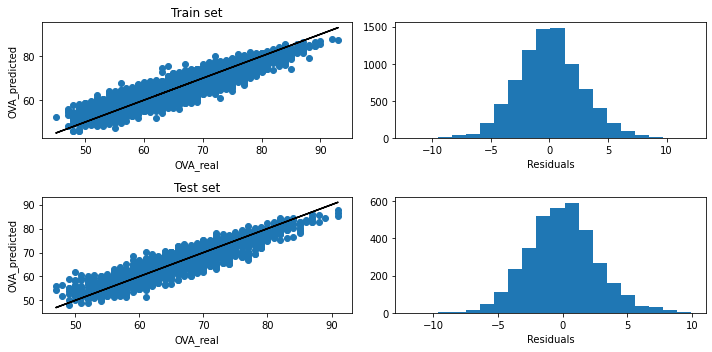

In [56]:
plot_results(y_train, y_pred_train, y_test, y_pred_test)

In [33]:
!ls

fifa21_train.csv     result_revised.ipynb


In [34]:
data2 = pd.read_csv("fifa21_validate.csv")

In [35]:
data2.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,...,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,...,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,...,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,...,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,...,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [36]:
data2 = clean_FIFA_dataframe(data2)
data2

,id,name,age,nationality,club,bp,position,team & contract,height,weight,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan",6.16,194.0,...,61.0,61.0,59.0,61.0,67.0,67.0,67.0,61.0,16.0,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,5.64,154.0,...,47.0,47.0,49.0,45.0,38.0,38.0,38.0,45.0,17.0,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,6.16,176.0,...,18.0,18.0,16.0,16.0,18.0,18.0,18.0,16.0,53.0,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,6.24,170.0,...,54.0,54.0,53.0,53.0,54.0,54.0,54.0,53.0,11.0,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,6.16,170.0,...,72.0,72.0,70.0,69.0,68.0,68.0,68.0,69.0,18.0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,239074,S. Aw,21,Senegal,Gil Vicente FC,LB,LB,Gil Vicente FC 2020 ~ 2023,5.64,143.0,...,52.0,52.0,58.0,58.0,54.0,54.0,54.0,58.0,15.0,60
1995,241223,S. Mogi,21,Japan,Cerezo Osaka,GK,GK,Cerezo Osaka 2017 ~ 2021,6.40,176.0,...,23.0,23.0,20.0,20.0,22.0,22.0,22.0,20.0,58.0,59
1996,210930,Carles Gil,27,Spain,New England Revolution,RM,RM CAM CM,New England Revolution 2019 ~ 2024,5.56,146.0,...,60.0,60.0,62.0,57.0,47.0,47.0,47.0,57.0,18.0,76
1997,162993,J. Perch,34,England,Mansfield Town,CDM,CDM RB CM,Mansfield Town 2020 ~ 2021,5.88,176.0,...,62.0,62.0,60.0,60.0,63.0,63.0,63.0,60.0,14.0,63


In [37]:
df2_num = data2.select_dtypes(np.number)
df2_num.head()

,id,age,height,weight,growth,value,wage,release clause,attacking,crossing,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,219461,23,6.16,194.0,7,975000.0,5000.0,0.0,230,47,...,61.0,61.0,59.0,61.0,67.0,67.0,67.0,61.0,16.0,67
1,221896,22,5.64,154.0,5,1200000.0,3000.0,2200000.0,298,62,...,47.0,47.0,49.0,45.0,38.0,38.0,38.0,45.0,17.0,68
2,247428,19,6.16,176.0,17,120000.0,500.0,249000.0,48,7,...,18.0,18.0,16.0,16.0,18.0,18.0,18.0,16.0,53.0,54
3,255120,16,6.24,170.0,23,160000.0,500.0,464000.0,215,38,...,54.0,54.0,53.0,53.0,54.0,54.0,54.0,53.0,11.0,55
4,215556,24,6.16,170.0,5,2300000.0,13000.0,4300000.0,295,57,...,72.0,72.0,70.0,69.0,68.0,68.0,68.0,69.0,18.0,70


In [38]:
X2 = df2_num[['base stats', 'reactions', 'pas']]
y2 = df2_num['ova']

In [39]:
X2_normalized = minMaxScaler.transform(X2)
X2 = pd.DataFrame(X2_normalized, columns=X2.columns)

In [40]:
X2.head()

,base stats,reactions,pas
0,0.404580,0.549296,0.367647
1,0.496183,0.563380,0.544118
2,0.255725,0.239437,0.411765
3,0.286260,0.338028,0.323529
4,0.683206,0.563380,0.632353


In [45]:
y_pred_new = model.predict(X2)

In [46]:
y2 - y_pred_new

0       1.914333
1       0.854812
2       1.167398
3      -1.457260
4      -0.646487
          ...   
1994    1.808663
1995   -3.152562
1996    2.979717
1997   -2.029548
1998   -1.922733
Name: ova, Length: 1996, dtype: float64

In [47]:
r2_new = r2_score(y2, y_pred_new)
r2_new

0.8284620700718706

In [51]:
mse_new = mean_squared_error(y2,y_pred_new)
mse_new

7.839469048889171

In [53]:
rmse_new = np.sqrt(mse_new)
rmse_new

2.799905185696325

In [54]:
mae_new = mean_absolute_error(y2, y_pred_new)
mae_new

2.193395594779712